<a href="https://colab.research.google.com/github/HardikPrabhu/Quick-tutorials-for-pytorch/blob/main/A_notebook_for_pytorch_tensor_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

## Basics

Tensors are essentially numpy arrays with ability to store gradients and "connect" in a computational graph . (Not to be confused with mathematical notion of a tensor)

In [3]:
#Tensors just like numpy arrays store information in nested arrays.
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)
# some attributes
print(f"Shape of tensor: {x.shape}")
print(f"Datatype of tensor: {x.dtype}")
print(f"Device tensor is stored on: {x.device}")
print(f"Dimensions : {x.ndim}" )

tensor([[1, 2, 3],
        [4, 5, 6]])
Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu
Dimensions : 2


In [4]:
# Dimensions represents the "nested nature" of arrays.
# Dimensions or "x.ndim"  denotes the length of the "x.shape" array. Known as the dimension of a tensor (again not the Mathematical notion of dimenisions)
x = torch.tensor(2.3)
print(x,x.ndim,x.shape)  # A scaler value has a dimension 0. (unlike the vector space notion)

# 1-d with 1 element is not scaler
x = torch.tensor([3])
print(x,x.ndim,x.shape)

tensor(2.3000) 0 torch.Size([])
tensor([3]) 1 torch.Size([1])


Accesing elements in a tensor

In [5]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
# first row:
print("first row :", x[0])
# first column
print("first col :", x[:,0])
# first row first column
x[0,0] # returns a scaler

# changing an element (it happens in place)
x[1,1] = 10
print(x)

first row : tensor([1, 2, 3])
first col : tensor([1, 4, 7])
tensor([[ 1,  2,  3],
        [ 4, 10,  6],
        [ 7,  8,  9]])


In [6]:
# 3D example
x = torch.arange(1,28)
x = x.view(3,3,3)
print(x)

# first block
print("first block: ", x[0])
# first row of each block
print("first row of each block: ",x[:,0])
# first column of each block
print("first column of each block: ",x[:,:,0].T)   # [c1|c2|c3]

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])
first block:  tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
first row of each block:  tensor([[ 1,  2,  3],
        [10, 11, 12],
        [19, 20, 21]])
first column of each block:  tensor([[ 1, 10, 19],
        [ 4, 13, 22],
        [ 7, 16, 25]])


In [7]:
# value based masking (with boolean)
x > 5
# creates a tensor of same size. Each element is checked with the condition "value > 5"

tensor([[[False, False, False],
         [False, False,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]])

In [8]:
# fetch only the elements based on a boolean mask.
b_mask = x > 5
x[b_mask]  # Note that the output is of dimnsion 1. (useful to perform some arithmetic, like sum of all positive numbers etc.)

tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27])

In [9]:
# change the fetched elements.
x[b_mask] = 0
# Again it is an inplace operation (simple example: convert all negative numbers to zero)
x

tensor([[[1, 2, 3],
         [4, 5, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]])

In [ ]:
# Slicing  var[lower:upper:step] # return a slice of the tensor

a = torch.arange(1,21)
# only get the odd numbers in order
print(a[::2])
# print get even numbers in order
print(a[1::2])

# multiples of n:
n = 4
print(a[n-1::n])

n = 5
print(a[n-1::n])

# an alternative way to do it (masking)
print(a[a%n==0])

# end of the array (negative index)
print(a[:-1], a[-1]) # excluding the last term, last term
print(a[:-3], a[-3:]) # excluding the  last 3 terms, last 3 terms

# Same method could be generalized along multiple dimensions (See exercise 1.)


tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])
tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])
tensor([ 4,  8, 12, 16, 20])
tensor([ 5, 10, 15, 20])
tensor([ 5, 10, 15, 20])
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19]) tensor(20)
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]) tensor([18, 19, 20])


Element wise operations

In [10]:
# Elementwise operations between tensors of same shape:
a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([[1,2,3],[1,1,1]])
print("add:",a+b)
print("sub:", a-b)
print("div:", a/b )
print("mult:", a*b)

# element wise power: a_i**b_i for all i
print("pow:", a**b)

# elementwise (ufunc)
print(torch.sin(a))  # sin(a) - element wise
print(torch.exp(a))  # exponential(a) - element wise

# clipping the values (between a given range)
print(torch.clip(a, 3, 5))

add: tensor([[2, 4, 6],
        [5, 6, 7]])
sub: tensor([[0, 0, 0],
        [3, 4, 5]])
div: tensor([[1., 1., 1.],
        [4., 5., 6.]])
mult: tensor([[1, 4, 9],
        [4, 5, 6]])
pow: tensor([[ 1,  4, 27],
        [ 4,  5,  6]])
tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794]])
tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])
tensor([[3, 3, 3],
        [4, 5, 5]])


Along axis operations

* These includes operations such as reduction (taking sum, mean etc). These operations reduce the dimensions of the tensor
* Concatination, Reshaping etc.


In [11]:
# sum
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a.shape) # 2 dimensions. dim = 0 or 1
# all values added, if no axis is passed
print(a.sum())


torch.Size([4, 3])
tensor(78)


The reduction operations (mean,sum etc.) will reduce the dimension passed as axis.

shape(2,3) -> shape(3) ; if axis=0

shape(2,3) -> shape(2) ; if axis=1

Example:

For a 2-d array

Sum on axis 0 :

Sum([[a,b,c],
[d,e,f]]) = [a+d,b+e,c+f]

Sum on axis 1 :

Sum([[a,b,c],
[d,e,f]]) = [a+b+c,d+e+f]

In [12]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a.shape) # 2 dimensions. dim = 0 or 1


print("size along axis 0 :",a.size(axis = 0))
x = a.sum(axis=0)
print(x)
print(x.shape)

# O axis had 4 length (outer array size)
# Operation is performed on the elements of outer array
# Elements of the outer array are "summed" together.
# If the elements themselves are of equal dimension, elemntwise operation is performed


torch.Size([4, 3])
size along axis 0 : 4
tensor([22, 26, 30])
torch.Size([3])


In [13]:
print("size along axis 1 :", a.size(axis = 1))
x = a.sum(axis=1)
print(x)
print(x.shape)

# 1 axis had 3 length (inner array size)
# Operation is performed on the elements of the inner array.



size along axis 1 : 3
tensor([ 6, 15, 24, 33])
torch.Size([4])


In [14]:
a = torch.tensor([[[1,2,3],[1,2,1]],[[1,1,1],[3,4,0]]])
a.shape

# sum of elements within a 1-d tensor is scaler
# sum of two tensors is tensor of same size (elementwise)


torch.Size([2, 2, 3])

sum axis 0 :
[[1,2,3] + [1,1,1], [1,2,1] +[3,4,0]] shape (2,3)



In [15]:
a.sum(axis = 0)

tensor([[2, 3, 4],
        [4, 6, 1]])

sum axis 1 :  [[1,2,3] + [1,2,1],[[1,1,1]+[3,4,0]] shape(2,3)

In [ ]:
a.sum(axis = 1)

tensor([[2, 4, 4],
        [4, 5, 1]])

sum axis 2 : [[1+2+3,1+2+1],[1+1+1,3+4+0]] shape (2,2)

In [ ]:
a.sum(axis = 2)

tensor([[6, 4],
        [3, 7]])

In [16]:
# concatnation is done along axis as well
print(a.shape)
b = torch.concat([a,a],dim = 0)
print(b.shape)
c = torch.concat([a,a],dim = 1)
print(c.shape)
d = torch.concat([a,a],dim = 2)
print(d.shape)



print(a.shape)
b = torch.concat([a,a,a],dim = 0)
print(b.shape)
c = torch.concat([a,a,a,a,a,a],dim = 1)
print(c.shape)
d = torch.concat([a,a,a,a],dim = 2)
print(d.shape)

torch.Size([2, 2, 3])
torch.Size([4, 2, 3])
torch.Size([2, 4, 3])
torch.Size([2, 2, 6])
torch.Size([2, 2, 3])
torch.Size([6, 2, 3])
torch.Size([2, 12, 3])
torch.Size([2, 2, 12])


In [17]:
print(c)

tensor([[[1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1],
         [1, 2, 3],
         [1, 2, 1]],

        [[1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0],
         [1, 1, 1],
         [3, 4, 0]]])


In [18]:
# the rest of the dims should match in order to concat

a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([[1,2,3]])
print(torch.concat([a,b],dim = 0))

# error # size should match expect in dim 1
#print(torch.concat([a,b],dim = 1))

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3]])


# Exercise 1.

Create the following 2-d tensor and provide code for obtaining 4 diffrerent  slices

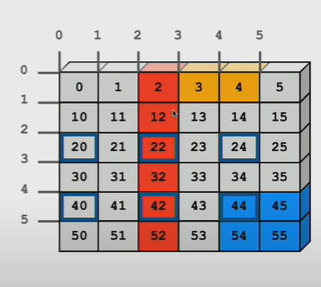

In [ ]:
# create the array by using previous knoweledge (no broadcasting yet!)
x = torch.arange(6)
x = x.view(-1,1)
y = torch.concat([x for i in range(6)],axis=1)
print(10*y)

x = x.view(1,-1)
z = torch.concat([x for i in range(6)],axis=0)
print(z)

a = z+10*y
print(a)

tensor([[ 0,  0,  0,  0,  0,  0],
        [10, 10, 10, 10, 10, 10],
        [20, 20, 20, 20, 20, 20],
        [30, 30, 30, 30, 30, 30],
        [40, 40, 40, 40, 40, 40],
        [50, 50, 50, 50, 50, 50]])
tensor([[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]])
tensor([[ 0,  1,  2,  3,  4,  5],
        [10, 11, 12, 13, 14, 15],
        [20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35],
        [40, 41, 42, 43, 44, 45],
        [50, 51, 52, 53, 54, 55]])


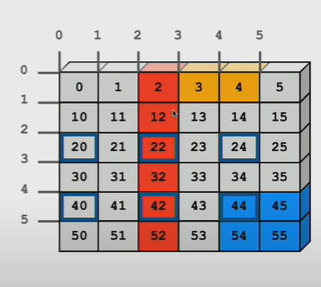

In [ ]:
# red
a[:,2].view(-1,1)

tensor([[ 2],
        [12],
        [22],
        [32],
        [42],
        [52]])

In [ ]:
# yellow
a[0,3:5]

tensor([3, 4])

In [ ]:
# blue
a[-2:,-2:]

tensor([[44, 45],
        [54, 55]])

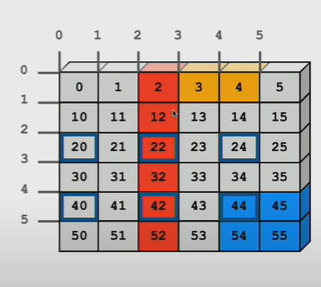

In [ ]:
#blue-border
a[2::2,::2]

tensor([[20, 22, 24],
        [40, 42, 44]])

In [ ]:
# fancy indexing, to get diagonal
# cordinates (indices) could be passed as lists as well.

# To get the 2nd, 5th and 6th rows
print(a[[1,4,5]])
# To get 3rd columns
print(a[:,[2]])
# Note the difference
print(a[:,2])
# getting diagonal terms
ind = [i for i in range(0,6)]
print(ind)
a[ind,ind]
# Note : Make a habit of reshaping if you are not sure about the output shape.

tensor([[10, 11, 12, 13, 14, 15],
        [40, 41, 42, 43, 44, 45],
        [50, 51, 52, 53, 54, 55]])
tensor([[ 2],
        [12],
        [22],
        [32],
        [42],
        [52]])
tensor([ 2, 12, 22, 32, 42, 52])
[0, 1, 2, 3, 4, 5]


tensor([ 0, 11, 22, 33, 44, 55])

# Advanced --- Broadcasting!

The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:



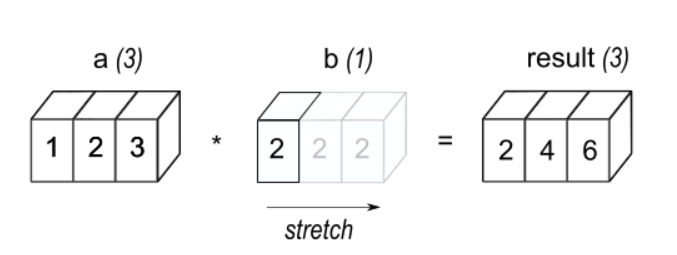

In [ ]:
a = torch.tensor([1.0, 2.0, 3.0])
b = 2.0
print(a * b)

# same as
b = torch.tensor(b)
print(b.shape,a.shape)
b*a # remember the operations are elementwise, so shape should match! (done by copying - not in memory tho)

tensor([2., 4., 6.])
torch.Size([]) torch.Size([3])


tensor([2., 4., 6.])

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

* they are equal, or

* one of them is 1

Note that missing dimensions are assumed to have size one. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays


In [ ]:
a = torch.tensor([[1,2,3],[4,5,6]])
b = torch.tensor([[[1],[2]],[[3],[4]]])
print(a.shape)
print(b.shape)

torch.Size([2, 3])
torch.Size([2, 2, 1])


In [ ]:
# We can perfrom the "+" operation

# a shape : [1,2,3]
# b shape : [2,2,1]

# both satisfy the broadcasting criteria

# first, reshape a by adding extra dimension

print("changes made to a ...")
print(a)
x = a.view(1,2,3)
print("...")
print(x)
print("...")
x = torch.concat([x,x],axis = 0)
print(x)

print("changes made to b ...")
print(b)
print("...")
y = torch.concat([b,b,b],axis = 2)
print(y)
print("...")



changes made to a ...
tensor([[1, 2, 3],
        [4, 5, 6]])
...
tensor([[[1, 2, 3],
         [4, 5, 6]]])
...
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])
changes made to b ...
tensor([[[1],
         [2]],

        [[3],
         [4]]])
...
tensor([[[1, 1, 1],
         [2, 2, 2]],

        [[3, 3, 3],
         [4, 4, 4]]])
...


In [ ]:
print(x + y)
print(a+b)
(x+y == a+b).all() # same matrices

print(a*b) # element-wise

tensor([[[ 2,  3,  4],
         [ 6,  7,  8]],

        [[ 4,  5,  6],
         [ 8,  9, 10]]])
tensor([[[ 2,  3,  4],
         [ 6,  7,  8]],

        [[ 4,  5,  6],
         [ 8,  9, 10]]])
tensor([[[ 1,  2,  3],
         [ 8, 10, 12]],

        [[ 3,  6,  9],
         [16, 20, 24]]])


## Exercise 2.

1. Do min-max scaling using broadcasting

In [ ]:
X = torch.tensor([[1,2,3],[4,3,5],[12,12,3],[2,4,1],[1,2,4],[4,12,5]])
print(X)
m = X.min(axis=0).values
print(m)
M = X.max(axis=0).values
print(M)
(X-m)/(M-m)
# So simple!

tensor([[ 1,  2,  3],
        [ 4,  3,  5],
        [12, 12,  3],
        [ 2,  4,  1],
        [ 1,  2,  4],
        [ 4, 12,  5]])
tensor([1, 2, 1])
tensor([12, 12,  5])


tensor([[0.0000, 0.0000, 0.5000],
        [0.2727, 0.1000, 1.0000],
        [1.0000, 1.0000, 0.5000],
        [0.0909, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.7500],
        [0.2727, 1.0000, 1.0000]])

2. Create the same array using broadcasting

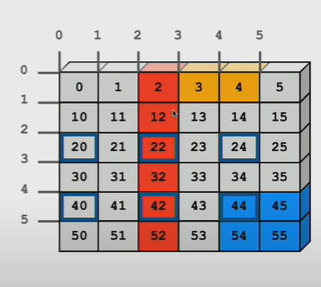

In [ ]:
x = torch.arange(0,6) # shape is (6)
a = x.view(1,-1)# shape is (1,6)
b = 10*x.view(-1,1) # shape is (6,1)
a + b

tensor([[ 0,  1,  2,  3,  4,  5],
        [10, 11, 12, 13, 14, 15],
        [20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35],
        [40, 41, 42, 43, 44, 45],
        [50, 51, 52, 53, 54, 55]])

In [ ]:
a = torch.ones(5)
b = a.view(-1,1)
print((a+ b)/2)
# same as
torch.ones((5,5))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

# Some more stuff

In [ ]:
# Matrix multiplication
A = torch.tensor([[1,2,3],[4,5,6]]) #2x3
B = torch.tensor([[1],[0],[3]])  # 3x1
A@B # 2x1

tensor([[10],
        [22]])

In [ ]:
# 2d with 1d will do the operation but will return 1d (row, column vector wont be distinct in shape)
A = torch.tensor([[1,2,3],[4,5,6]]) #2x3
B = torch.tensor([1,0,3]) # 3
C = torch.tensor([1,2]) # 2
print(A@B)
print(C@A)
# same as
C.view(1,-1)@A # but this is in 2d

tensor([10, 22])
tensor([ 9, 12, 15])


tensor([[ 9, 12, 15]])

In [ ]:
# determinant
A = torch.tensor([[1.,3,5],[2,2,1],[1,0,3]])
print(torch.linalg.det(A)) # returns only the value (in built method)


# A Good exercise would be to do it manually!
# det(A) = sum (-1)^(j) det(M0j)

def det(A):
  if list(A.shape) == [1,1]:
    return A
  else:
    d = 0
    for j in range(A.shape[-1]):
           M = torch.concat([A[1:,:j],A[1:,j+1:]],dim=1)
           d = d + ((-1)**j)*A[0,j]*det(M)

  return d

print(det(A))



tensor(-19.)
tensor([[-19.]])


# Deep learning Tutorial

* We should have some understanding of how the neural net functions operate under the hood.

* First we will do  all the computations just using tensors for simple networks.

* Then we should be able to implement more clever ideas using our nets.





A simple linear transformation :

 A linear transformation is given by  $y = Ax$. Let $x \in R^{10}$ and $y \in R^5$. Then the shape of the matrix A should be (5,10)

In [ ]:
# y = Ax
x = torch.tensor([1,2,3,4,5,6,7,8,9,10]).view(-1,1) # as  a column
A = torch.randint(0,2,(5,10))
y = A@x
print(x, A, y)

tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]) tensor([[0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 1, 0, 0, 1, 0, 1],
        [1, 0, 1, 1, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 0]]) tensor([[32],
        [31],
        [21],
        [15],
        [13]])


Neural networks requires compution done in batches (Not one input at a time).

Therfore, the same transformation could be written as

$Y = XA^T$

where X is of shape (n,10), A of shape (5,10) and Y of shape(n,5). n is the number of samples. $X = [x_1,x_2, ...x_n]^T $







In [ ]:
n = 10
x = x.view(1,-1)
X = torch.concat([x]*n, axis = 0)  # batch of copies of same instance
Y = X@A.T
print(Y) # per row




tensor([[32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13],
        [32, 31, 21, 15, 13]])


In [ ]:
# Now, lets try y = Ax + b  (let broadcasting takes care of it)
b = torch.tensor([1,2,3,4,5])
Y= X@A.T + b
print(Y)

tensor([[33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18],
        [33, 33, 24, 19, 18]])


In [ ]:
# A neural network Layer Transform :   Have a horizontal view (data points are row vectors)
# Example of a soft-max operation

in_dim = 10
X = torch.rand(4,in_dim)  # 4 rows 10 features
out_dim = 5
W = torch.rand(in_dim,out_dim)
b = torch.rand(out_dim)
Z = X@W + b # broadcasting does the trick:  shape(4,5) + shape(5) ->  shape(4,5) + shape(1,5) -> shape(4,5) + shape(5,5) # creates copy of b per row and then
Z = torch.exp(Z) # element wise exp  (4,5)
print(Z.shape)
s = Z.sum(axis=1).view(-1,1) # Reshaping is important otherwise in certain cases, broadcasting may result in undesired results
print(s.shape)
softmax_out = Z/s   # shape(4,5)/shape(4,1) -> shape(4,5)/shape(4,5) copying along 1 dim.
print(softmax_out)
print("all rows sum upto 1 (as it should be)")
softmax_out.sum(axis=1)


torch.Size([4, 5])
torch.Size([4, 1])
tensor([[0.0703, 0.2162, 0.1158, 0.1660, 0.4317],
        [0.0694, 0.1889, 0.1751, 0.1509, 0.4156],
        [0.0590, 0.2528, 0.1850, 0.0962, 0.4070],
        [0.0397, 0.3259, 0.1256, 0.1421, 0.3667]])
all rows sum upto 1 (as it should be)


tensor([1.0000, 1.0000, 1.0000, 1.0000])

# Basic models using pytorch

In [ ]:
import torch
import torch.nn as nn


1. Linear/logistic regression

In [ ]:
# First use randn to genetate some data
X = torch.normal(0, 3, size=(100, 4))
W = torch.tensor([1.0,2,4,1])
b = torch.ones(100)
Y =  X @ W  + b
print(Y.shape)


torch.Size([100])


In [ ]:
T = torch.normal(0,1,(4,))
c = torch.tensor(0.0)
params = [T,c]
for p in params:
    p.requires_grad=True

learning_rate = 1e-3

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params,lr = learning_rate)

In [ ]:

for steps in range(10000):
  Y_pred = X@T + c
  loss = criterion(Y,Y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print(loss.item())






1.8584244143582396e-09


In [ ]:
T,c

(tensor([1.0000, 2.0000, 4.0000, 1.0000], requires_grad=True),
 tensor(1.0000, requires_grad=True))

In [ ]:
# more modular apporach
criterion = nn.MSELoss()
class Linear_Regression(nn.Module):
   def __init__(self, in_feat):
    super().__init__() # call
    self.out = nn.Linear(in_feat,1) # this is going to be the name
   def forward(self,x,y=None):
      x = self.out(x)
      if y is None:
        return x
      y = y.view(-1,1)
      return criterion(x,y) # retun the loss or return the value, depends on the use



In [ ]:
model = Linear_Regression(4)
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

for steps in range(10000):
  optimizer.zero_grad()
  loss = model(X,Y)
  loss.backward()
  optimizer.step()  # Y_pred = 100
print(loss.item())



1.8584244143582396e-09


In [ ]:
for name,i in model.named_parameters():
  print(name, i)

out.weight Parameter containing:
tensor([[1.0000, 2.0000, 4.0000, 1.0000]], requires_grad=True)
out.bias Parameter containing:
tensor([1.0000], requires_grad=True)


In [ ]:
# same problem logistic regression
Y[Y>0] = 1
Y[Y<=0] = 0

In [ ]:
criterion = nn.BCELoss()

class Logistic_Regression(nn.Module):
   def __init__(self, in_feat):
    super().__init__() # call
    self.out = nn.Linear(in_feat,1) # this is going to be the name
   def forward(self,x,y=None):
      x = self.out(x)
      x = torch.sigmoid(x)

      if y is None:
        return x
      y = y.view(-1,1)
      return criterion(x,y)


In [ ]:
model = Logistic_Regression(4)
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)



In [ ]:
for steps in range(10000):
  optimizer.zero_grad()
  loss = model(X,Y)
  loss.backward()
  optimizer.step()  # Y_pred = 100
print(loss.item())


for name,i in model.named_parameters():
  print(name, i)

0.04107170179486275
out.weight Parameter containing:
tensor([[0.8806, 2.0733, 3.8179, 1.2942]], requires_grad=True)
out.bias Parameter containing:
tensor([1.8413], requires_grad=True)


# Notes on gradient decsent

In [ ]:
a = torch.tensor([1.0,2,3],requires_grad=True)
y = torch.dot(a,a)
print(y)
# y is part of the computational graph
y.backward()
a.grad

tensor(14., grad_fn=<DotBackward0>)


tensor([2., 4., 6.])

Note : cant use the same y tensor, once backwards is called.

In [ ]:
# grad descent
a = torch.tensor([0.3,0.2,3],requires_grad=True)

def f(a):
  return torch.matmul(a,a)

for i in range(100):
  f(a).backward() # calculate gradient
  with torch.no_grad():
      a -=  0.1*a.grad  # (some leaf variable error o.w)
  print(a)
  a.grad.zero_() # resets the gradient



tensor([0.2400, 0.1600, 2.4000], requires_grad=True)
tensor([0.1920, 0.1280, 1.9200], requires_grad=True)
tensor([0.1536, 0.1024, 1.5360], requires_grad=True)
tensor([0.1229, 0.0819, 1.2288], requires_grad=True)
tensor([0.0983, 0.0655, 0.9830], requires_grad=True)
tensor([0.0786, 0.0524, 0.7864], requires_grad=True)
tensor([0.0629, 0.0419, 0.6291], requires_grad=True)
tensor([0.0503, 0.0336, 0.5033], requires_grad=True)
tensor([0.0403, 0.0268, 0.4027], requires_grad=True)
tensor([0.0322, 0.0215, 0.3221], requires_grad=True)
tensor([0.0258, 0.0172, 0.2577], requires_grad=True)
tensor([0.0206, 0.0137, 0.2062], requires_grad=True)
tensor([0.0165, 0.0110, 0.1649], requires_grad=True)
tensor([0.0132, 0.0088, 0.1319], requires_grad=True)
tensor([0.0106, 0.0070, 0.1056], requires_grad=True)
tensor([0.0084, 0.0056, 0.0844], requires_grad=True)
tensor([0.0068, 0.0045, 0.0676], requires_grad=True)
tensor([0.0054, 0.0036, 0.0540], requires_grad=True)
tensor([0.0043, 0.0029, 0.0432], requires_grad

Using optimizer instead

In [ ]:
from torch.optim import SGD
# grad descent
a = torch.tensor([0.3,0.2,3],requires_grad=True)

def f(a):
  return torch.matmul(a,a)

optimizer = SGD([a],0.1)
for i in range(100):
  f(a).backward() # calculate gradient
  """with torch.no_grad():
      a -=  0.1*a.grad
  """
  optimizer.step()
  optimizer.zero_grad() # resets the gradients of tensors involved
  print(a)



tensor([0.2400, 0.1600, 2.4000], requires_grad=True)
tensor([0.1920, 0.1280, 1.9200], requires_grad=True)
tensor([0.1536, 0.1024, 1.5360], requires_grad=True)
tensor([0.1229, 0.0819, 1.2288], requires_grad=True)
tensor([0.0983, 0.0655, 0.9830], requires_grad=True)
tensor([0.0786, 0.0524, 0.7864], requires_grad=True)
tensor([0.0629, 0.0419, 0.6291], requires_grad=True)
tensor([0.0503, 0.0336, 0.5033], requires_grad=True)
tensor([0.0403, 0.0268, 0.4027], requires_grad=True)
tensor([0.0322, 0.0215, 0.3221], requires_grad=True)
tensor([0.0258, 0.0172, 0.2577], requires_grad=True)
tensor([0.0206, 0.0137, 0.2062], requires_grad=True)
tensor([0.0165, 0.0110, 0.1649], requires_grad=True)
tensor([0.0132, 0.0088, 0.1319], requires_grad=True)
tensor([0.0106, 0.0070, 0.1056], requires_grad=True)
tensor([0.0084, 0.0056, 0.0844], requires_grad=True)
tensor([0.0068, 0.0045, 0.0676], requires_grad=True)
tensor([0.0054, 0.0036, 0.0540], requires_grad=True)
tensor([0.0043, 0.0029, 0.0432], requires_grad

In [ ]:
# use autograd instead if you want the gradient of intermidiate node (not the leaf node)
x = torch.tensor([2,2.0],requires_grad=True)
y = 3*x
z = torch.dot(y,y)
torch.autograd.grad(z, y)

(tensor([12., 12.]),)

In [ ]:
# Another example
x = torch.tensor([2,2.0],requires_grad=True)
y = 3*x
u = y + x
z = torch.dot(u,y)
torch.autograd.grad(z, y)


(tensor([14., 14.]),)

Basic neural networks in pytorch ...

In [ ]:
# Dataset
import numpy as np
X = np.random.normal(0,2,1000)
Y = X**2  + 2

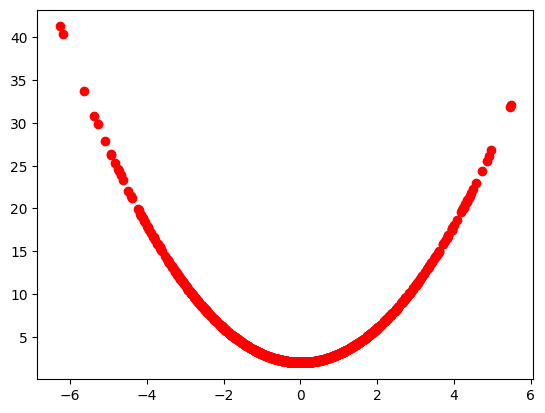

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,Y,"ro")

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32,1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

model = MyNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss = nn.MSELoss()
num_epochs = 500



In [ ]:
X_train = torch.tensor(X,dtype=torch.float).view(-1,1)
Y_train = torch.tensor(Y,dtype=torch.float).view(-1,1)

In [ ]:
for epoch in range(num_epochs):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)

        # Compute the loss
        l = loss(outputs, Y_train)

        # Backward pass
        l.backward()

        # Update the parameters
        optimizer.step()
        print(f"epoch: {epoch}", l)

epoch: 0 tensor(64.8419, grad_fn=<MseLossBackward0>)
epoch: 1 tensor(7.2806, grad_fn=<MseLossBackward0>)
epoch: 2 tensor(90.2206, grad_fn=<MseLossBackward0>)
epoch: 3 tensor(5.1715, grad_fn=<MseLossBackward0>)
epoch: 4 tensor(20.1646, grad_fn=<MseLossBackward0>)
epoch: 5 tensor(35.7113, grad_fn=<MseLossBackward0>)
epoch: 6 tensor(39.7810, grad_fn=<MseLossBackward0>)
epoch: 7 tensor(35.5771, grad_fn=<MseLossBackward0>)
epoch: 8 tensor(26.1852, grad_fn=<MseLossBackward0>)
epoch: 9 tensor(15.5533, grad_fn=<MseLossBackward0>)
epoch: 10 tensor(11.7443, grad_fn=<MseLossBackward0>)
epoch: 11 tensor(12.9120, grad_fn=<MseLossBackward0>)
epoch: 12 tensor(9.3258, grad_fn=<MseLossBackward0>)
epoch: 13 tensor(5.9229, grad_fn=<MseLossBackward0>)
epoch: 14 tensor(4.9384, grad_fn=<MseLossBackward0>)
epoch: 15 tensor(6.2239, grad_fn=<MseLossBackward0>)
epoch: 16 tensor(8.2057, grad_fn=<MseLossBackward0>)
epoch: 17 tensor(9.0937, grad_fn=<MseLossBackward0>)
epoch: 18 tensor(7.9009, grad_fn=<MseLossBackw

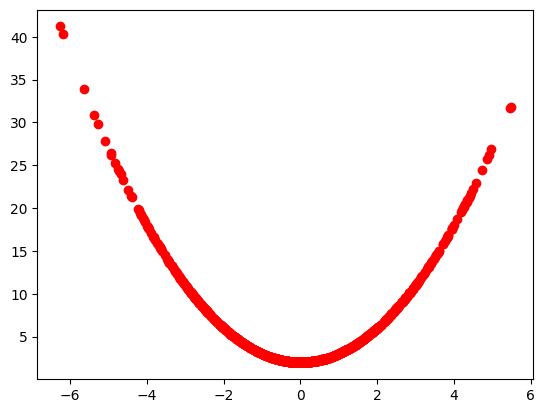

In [ ]:
pred = model(X_train).detach().numpy()
plt.plot(X,pred,"ro")

In [ ]:
# can I do gradient descent on the model itself, i.e update input based on model output?

x = torch.tensor([-10.0],requires_grad = True)

optimizer = torch.optim.Adam([x], lr=0.1)

for i in range(1000):
  out = model(x)
  out.backward()
  optimizer.step()
  optimizer.zero_grad()

print(x,model(x))  # close enough

tensor([0.1154], requires_grad=True) tensor([2.0005], grad_fn=<AddBackward0>)


# Rnns: The pytorch way

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
import pandas as pd
data = pd.read_csv("airline-passengers.csv")

--2023-06-29 21:49:29--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-06-29 21:49:29 (31.8 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



((100,), (44,))

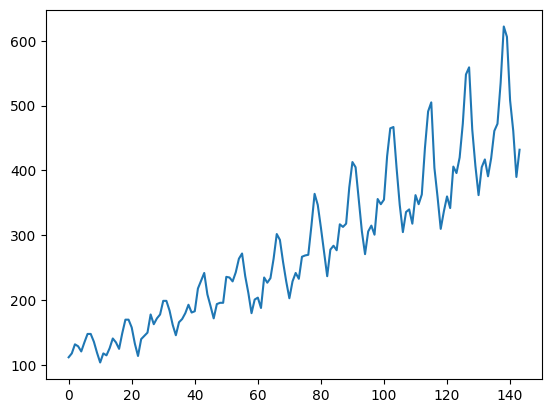

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data["Passengers"])
split = int(len(data)*0.7)
timeseries = data["Passengers"]
train,test = data["Passengers"][:split], data["Passengers"][split:]
train.shape,test.shape

In [ ]:
def create_seq(data,stepsize=5,type="train",m=0,s=1):
  X,y = [],[]

  if type=="train":
    m = data.mean()
    s = data.std()

  data = (data - m)/s

  data = list(data)
  for i in range(len(data)-stepsize): # [0,1,2,3,4]
    feature = data[i:i+stepsize]
    target = data[i+stepsize]
    X.append(feature)
    y.append(target)
  return torch.tensor(X).float().view(-1,5,1), torch.tensor(y).float().view(-1,1),m,s

In [ ]:
X_train,Y_train,m,s = create_seq(train)
X_test,Y_test,m_,s_ = create_seq(test,m=m,s=s,type="test")

In [ ]:
X_train = X_train.view(-1,5,1)
Y_train = Y_train.view(-1,1)
X_train.shape, X_test.shape

(torch.Size([95, 5, 1]), torch.Size([39, 5, 1]))

In [ ]:
class Airmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.lstm = nn.LSTM(input_size =1,hidden_size =50,num_layers=1,batch_first=True)
    self.linear = nn.Linear(50,1)
  def forward(self,x):
    x,_ = self.lstm(x)
    x = x[:,-1,:] # only the last
    x = self.linear(x)
    return x

In [ ]:
import numpy as np
import torch.utils.data as data
model = Airmodel()
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, Y_train), shuffle=True, batch_size=32)



In [ ]:
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, Y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, Y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 0.0256, test RMSE 0.9445
Epoch 100: train RMSE 0.0211, test RMSE 0.9505
Epoch 200: train RMSE 0.0133, test RMSE 0.9478
Epoch 300: train RMSE 0.0105, test RMSE 0.9502
Epoch 400: train RMSE 0.0183, test RMSE 0.9496
Epoch 500: train RMSE 0.0106, test RMSE 0.9481
Epoch 600: train RMSE 0.0370, test RMSE 0.9610
Epoch 700: train RMSE 0.0019, test RMSE 0.9445
Epoch 800: train RMSE 0.0153, test RMSE 0.9402
Epoch 900: train RMSE 0.0142, test RMSE 0.9456
Epoch 1000: train RMSE 0.0109, test RMSE 0.9466
Epoch 1100: train RMSE 0.0045, test RMSE 0.9445
Epoch 1200: train RMSE 0.0089, test RMSE 0.9444
Epoch 1300: train RMSE 0.0115, test RMSE 0.9379
Epoch 1400: train RMSE 0.0082, test RMSE 0.9373
Epoch 1500: train RMSE 0.0017, test RMSE 0.9386
Epoch 1600: train RMSE 0.0012, test RMSE 0.9386
Epoch 1700: train RMSE 0.0173, test RMSE 0.9320
Epoch 1800: train RMSE 0.0024, test RMSE 0.9430
Epoch 1900: train RMSE 0.0007, test RMSE 0.9426


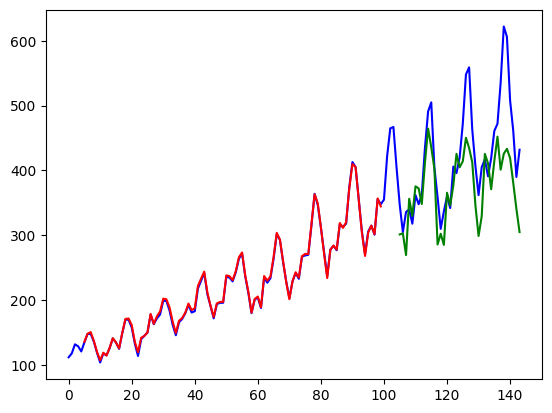

In [ ]:
train_size = len(train)
lookback = 5
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)

    train_plot[lookback:train_size] = model(X_train).view(-1)*s +m
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test).view(-1)*s +m
# plot
plt.plot(timeseries, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()